In [1]:
#importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from math import sqrt

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
#reading the energy data
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


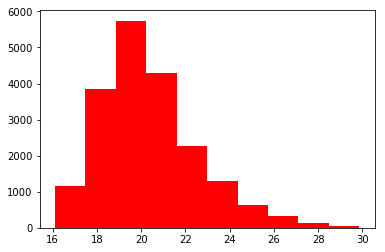

In [3]:
#plotting histogram to checking the distribution of temperature in the living room
#the minimum temperature is 16 Degree C and the maximun is close to 30 Degree C
plt.hist(df['T2'],color='red')
plt.show()

In [4]:
#descriptive statistics of Temperature in the living room 
df['T2'].describe()

count    19735.000000
mean        20.341219
std          2.192974
min         16.100000
25%         18.790000
50%         20.000000
75%         21.500000
max         29.856667
Name: T2, dtype: float64

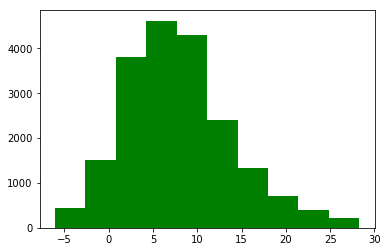

In [5]:
#plotting histogram to checking the distribution of temperature outside the building
#there are negatuve temperature outside the building, the maximun temperature is close to 30 Degree C
plt.hist(df['T6'], color='green')
plt.show()

In [6]:
#descriptive statistics of Temperature in the outside the building 
df['T6'].describe()

count    19735.000000
mean         7.910939
std          6.090347
min         -6.065000
25%          3.626667
50%          7.300000
75%         11.256000
max         28.290000
Name: T6, dtype: float64

In [7]:
#there is a strong correlation between the temperature in the room and temperature outside the building
df['T2'].corr(df['T6'])

0.8011860477351997

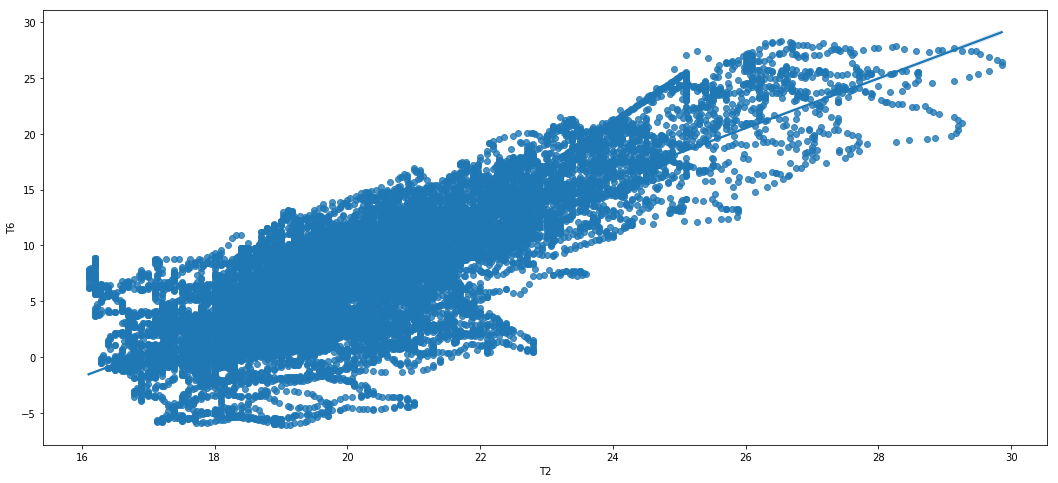

In [8]:
#there is a correlation between the temperature inside the room and temperature outside in the positive direction that is
#as temperature inside the room increase the temperature outside the building increases
plt.figure(figsize=(18,8))
sns.regplot(x='T2', y='T6',data=df)
plt.show()

# 12

In [9]:
#creating the independent (X) variable and the dependent (y) variable
X = df['T2'].values.reshape(-1,1)
y = df['T6'].values

X.shape, y.shape

((19735, 1), (19735,))

In [10]:
#building a linear regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X,y)
simple_linear_model_pred = simple_linear_model.predict(X)
print(f"The R^Squared value between T2 and T6 is {round(r2_score(y,simple_linear_model_pred),2)}")

The R^Squared value between T2 and T6 is 0.64


# 13 - 17

# 13

In [12]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [13]:
#dropping the date and light column and assign the resulting dataframe to a new variable called new_df 
new_df = df.drop(['date','lights'],axis=1)
new_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [16]:
#scaling the data with MinMax Scaler
scaler = MinMaxScaler()
new_df_scaled =  pd.DataFrame(scaler.fit_transform(new_df),  columns = new_df.columns)
new_df_scaled.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [17]:
#creating the predictor (X) variables and response (y) variable
X = new_df_scaled.drop('Appliances',axis=1)
y = new_df_scaled['Appliances']

In [18]:
#Splitting data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
#building multiple linear regression model
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train,y_train)
multiple_linear_model_pred = multiple_linear_model.predict(X_test)
print(f"The MAE value for multiple linear regression model is {round(mean_absolute_error(y_test,multiple_linear_model_pred),2)}")

The MAE value is 0.05


# 14

In [20]:
#Residual sum of squared of multiple linear regression model
print(f"The RSS for multiple linear regression model is {round(mean_squared_error(y_test,multiple_linear_model_pred),2)}")

The RSS is 0.01


# 15

In [58]:
#Root mean sqared error for multiple linear regression model
print(f"The RMSE value for multiple linear regression model is {round(sqrt(mean_squared_error(y_test,multiple_linear_model_pred)),3)}")

The RMSE value for multiple linear regression model is 0.088


# 16

In [23]:
#the r squared values for multiple linear regression model
print(f"The Coefficient of Determination for multiple linear regression model is {round(r2_score(y_test,multiple_linear_model_pred),2)}")

The Coefficient of Determination  is 0.15


# 17

In [45]:
#obtaining the features weights for each model that is used to train the multiple linear regression model
mlr_future_weight = pd.DataFrame(X.columns, columns=['Features'])
mlr_future_weight['Weight'] = multiple_linear_model.coef_
mlr_future_weight.sort_values(by='Weight', ascending=False)

,Features,Weight
1,RH_1,0.553547
4,T3,0.290627
10,T6,0.236425
23,Tdewpoint,0.117758
14,T8,0.101995
5,RH_3,0.096048
11,RH_6,0.038049
21,Windspeed,0.029183
6,T4,0.028981
7,RH_4,0.026386


# 18

In [59]:
#Bulding a Ridge model with an alpha of 0.04 for penalization
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(X_train,y_train)
ridge_model_pred = ridge_model.predict(X_test)
print(f"The RMSE value for Ridge regression Model is {round(sqrt(mean_squared_error(y_test,ridge_model_pred)),3)}")

The RMSE value for Ridge regression Model is 0.088


# 19

In [47]:
#building a lasso regression model with an alpha value of 0.001
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)
lasso_model_pred = lasso_model.predict(X_test)

In [53]:
#Obtaining the lasso non-zero feature weights
lasso_future_weight = pd.DataFrame(X.columns, columns=['Features'])
lasso_future_weight['Weight'] = lasso_model.coef_
lasso_future_weight[lasso_future_weight['Weight'] != 0].sort_values(by='Weight', ascending=False)

,Features,Weight
1,RH_1,0.017880
21,Windspeed,0.002912
15,RH_8,-0.000110
20,RH_out,-0.049557


# 20

In [54]:
#the root mean squared error value for the lasso regression model
print(f"The RMSE value for lasso regression is {round(sqrt(mean_squared_error(y_test,lasso_model_pred)),3)}")

The RMSE value for lasso regression is 0.094
